# Task 1 Notebook (Iris)
## Introduction
In this notebook, we'll be working with the Iris dataset. We will first do some explanatory data analysis to understand the data. Then, we'll build a logistic regression and a knn classifier models to train on part of the data and be able to predict unseen data. In the end, we'll compare between the models performance based on the classification reports which show the precision, recall, f1_score, and accuracy.

### Explanatory data analysis

1. Importing packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

2. Importing and manipulating data

In [5]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Iris.csv")
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.rename_categories(lambda x: x[5:].title())
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa


3. Checking data info. This helps ensures data types and missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


We can see that data types are correct. In adddition, all columns contain 150 non-null data, which means there are no missing values since there are 150 entries.

4. Checking for any duplicate rows.

In [10]:
df.duplicated().sum()

0

5. Showing some data statistics with the describe method.

In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


6. Showing the mean of each feature grouped by species.

In [14]:
numerical_data = df.select_dtypes('number').drop('Id',axis=1)
df.groupby('Species')[numerical_data.columns].mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Setosa,5.006,3.418,1.464,0.244
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


7. Plotting a pairplot that shows the relationship between different features, in addition to the distribution of each feature on the diagonal axis. The visualization shows things according to the different species, using hue: <span style="color:blue">Setosa</span>, <span style="color:orange">Versicolor</span>, and <span style="color:green">Virginica</span>.


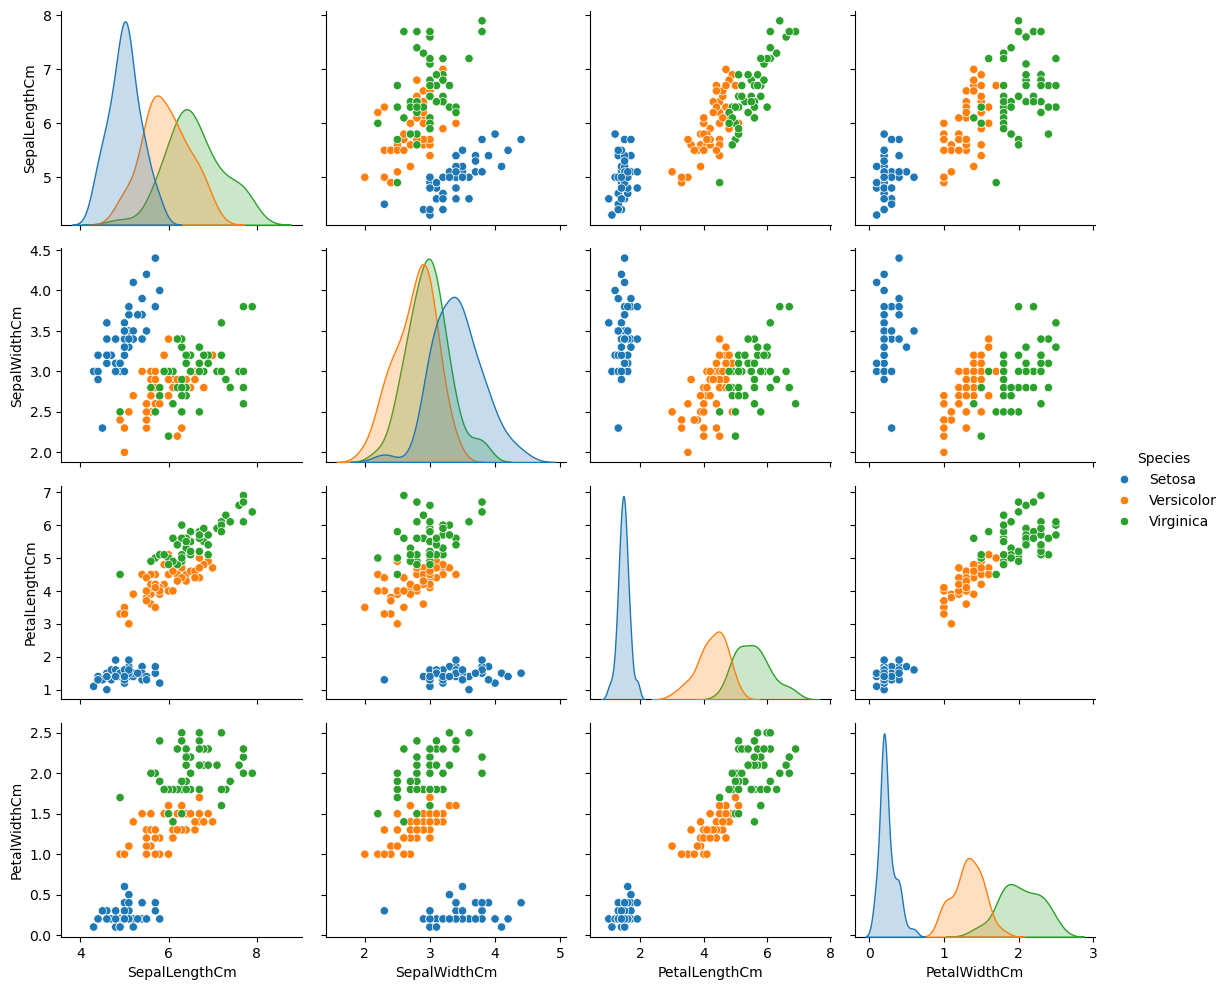

In [16]:
pairplot = sns.pairplot(df.drop('Id',axis=1), hue='Species')
pairplot._legend.set_bbox_to_anchor((1.1, 0.5))
plt.tight_layout()
plt.show()

8. Plotting a heatmap of the correlation matrix between the features.

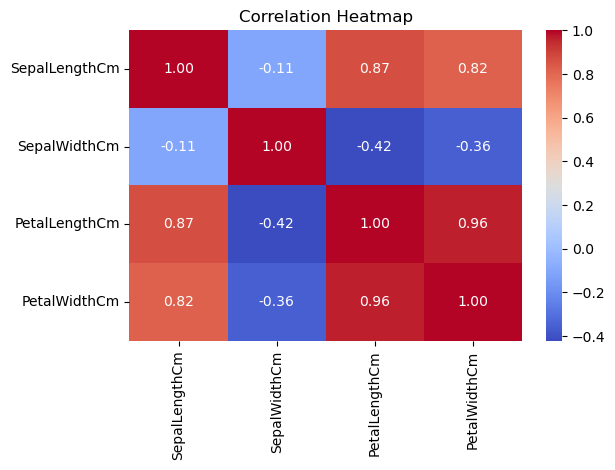

In [18]:
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True ,cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

9. Plotting a boxplot for each feature colored by the different species.

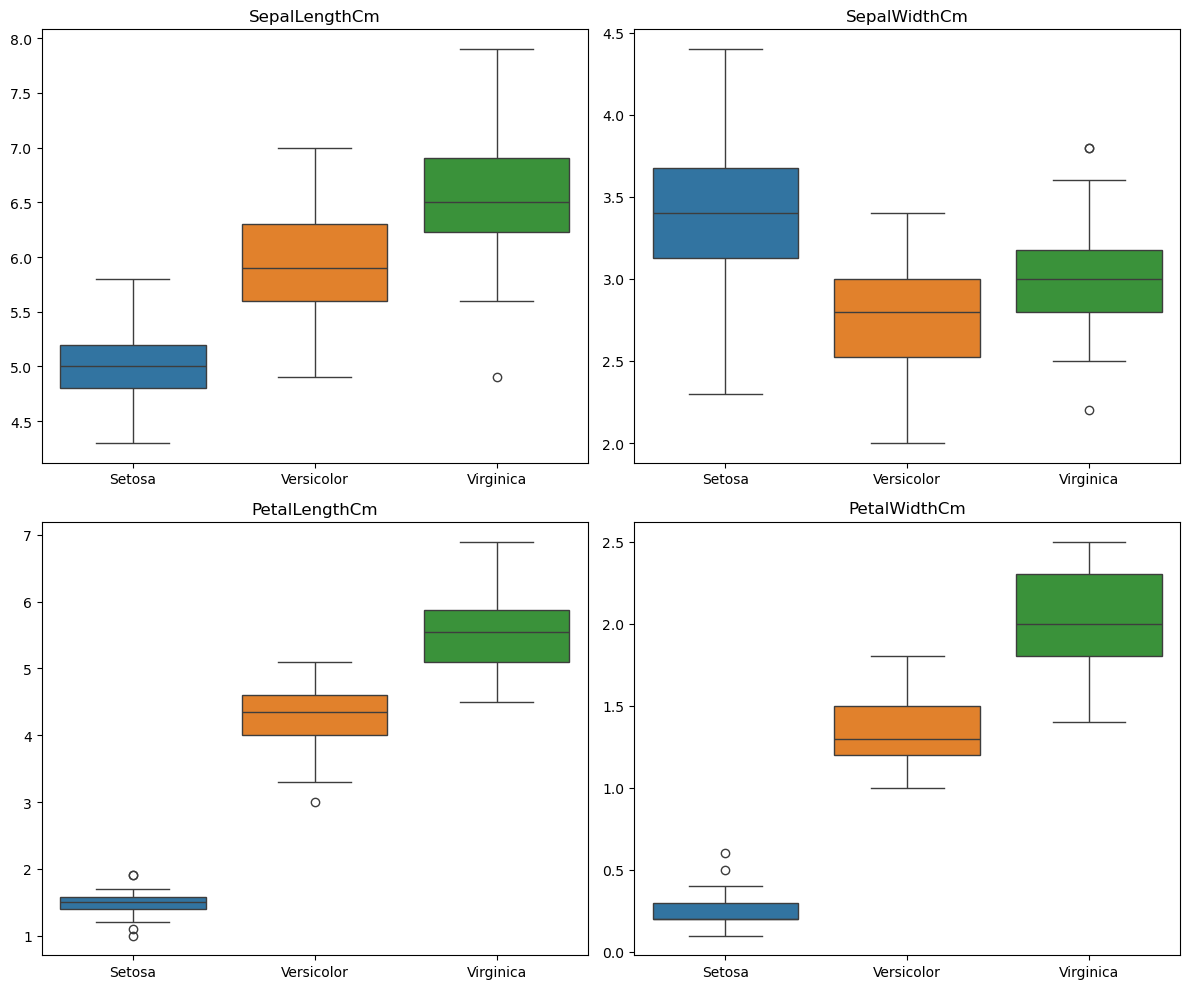

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_data.columns):
    sns.boxplot(data=df, x='Species', y=col, hue='Species', ax=axes[i])
    axes[i].set(title=col, xlabel='', ylabel='')
plt.tight_layout()
plt.show()

We can clearly see that the features are distributed in the order: <span style="color:blue">Setosa</span>, <span style="color:orange">Versicolor</span>, then <span style="color:green">Virginica</span>, except for *Sepal Width*. So in general, we can say that <span style="color:blue">Setosa</span> is small, <span style="color:orange">Versicolor</span> is medium, and <span style="color:green">Virginica</span> is large.

### Logistic Regression

1. Preparing and splitting feature and target data into train and test sets, and setting the random_state argument to ensures reproducibilty.

In [24]:
X = numerical_data
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

2. Implementing the LogisticRegression model and printing its performance.

In [26]:
logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)
performance = classification_report(y_test, y_pred)
print('Here is the classification report for the logistic regression model:\n')
print(performance)

Here is the classification report for the logistic regression model:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       0.91      0.91      0.91        11
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



We can see that the model performs perfectly in identifying the <span style="color:blue">Setosa</span> species. It still does well for the other species but with slightly less performance, so the overall accuracy is 0.93.
Below I'll plot the report in the form of a heatmap to better visualize the performance.

In [28]:
report_dict_logreg = classification_report(y_test, y_pred, output_dict=True)
report_df_logreg = pd.DataFrame(report_dict_logreg).transpose()

### KNN Classifier

1. Implmenting the KNN Classifier with different number of neighbors and visualize the accuracy on the training and test sets, to determine the best number of neighbors for the model.

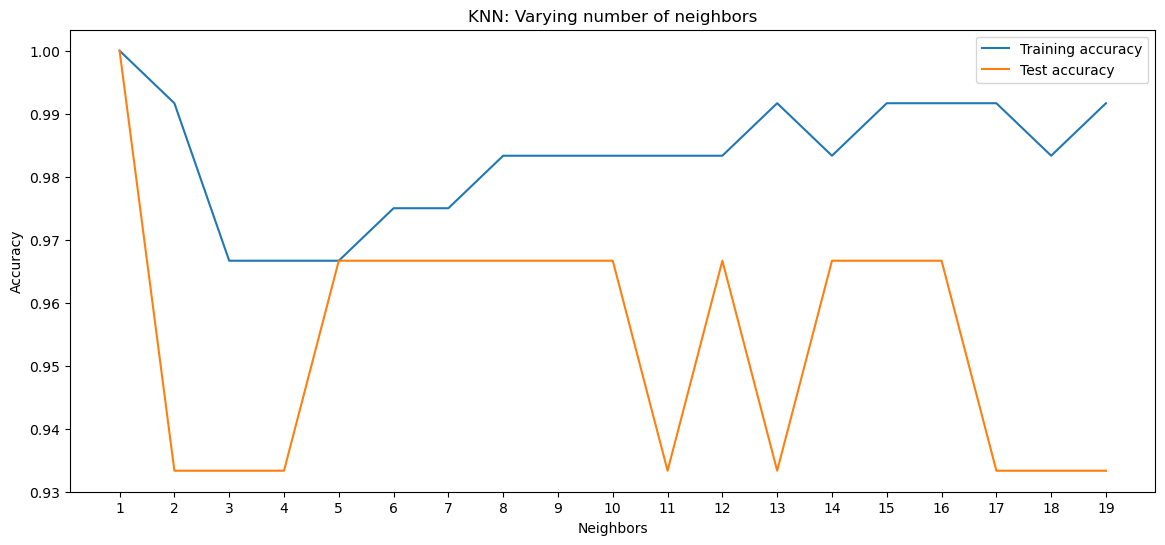

In [31]:
train_acc = []
test_acc = []
neighbors = [_ for _ in range(1,20)]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X, y)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.figure(figsize=(14,6))
plt.title('KNN: Varying number of neighbors')
plt.plot(neighbors, train_acc, label='Training accuracy')
plt.plot(neighbors, test_acc, label='Test accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.xticks(ticks=neighbors)
plt.show()

With k=5, the training and test accuracy are high, but also the closest to each other which means a better generalization to unseen data.

2. Implementing the KNN Classifier with k set to 5, and printing the performance.

In [34]:
knn_16 = KNeighborsClassifier(n_neighbors=5).fit(X, y)
y_pred = knn_16.predict(X_test)
performance = classification_report(y_test, y_pred)
print(performance)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       0.92      1.00      0.96        11
   Virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Comparing the models

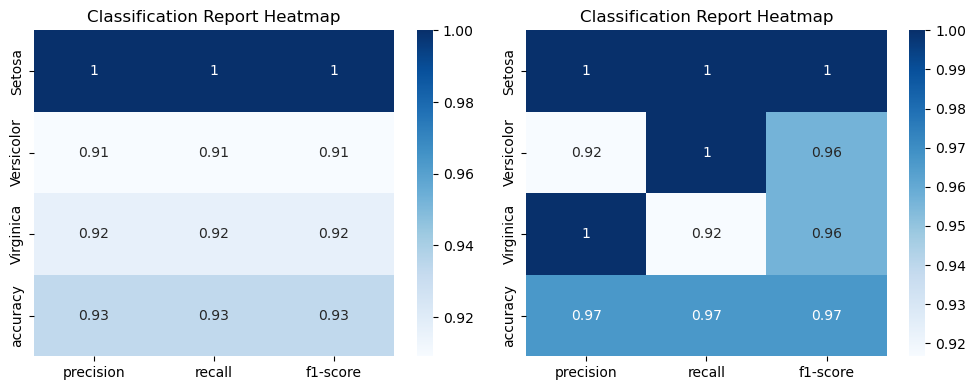

In [36]:
report_dict_knn = classification_report(y_test, y_pred, output_dict=True)
report_df_knn = pd.DataFrame(report_dict_knn).transpose()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(report_df_logreg.iloc[:-2, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.subplot(1,2,2)
sns.heatmap(report_df_knn.iloc[:-2, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()

## Conclusion
Comparing the ***Logistic Regression*** and ***KNN Classifier*** classification reports, we can see that the ***KNN Classifier*** performs a bit better.